In [102]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [103]:
df = pd.read_csv('data.csv')

In [104]:
#check data types
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [105]:
# Dropping irrelevant columns

df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)


In [106]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [107]:
# rename column names
df= df.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"Price" })

In [108]:
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [109]:
# total number of rows and columns
df.shape

(11914, 10)

In [110]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicated rows:',duplicate_rows_df.shape)

number of duplicated rows: (989, 10)


In [111]:
# count number of rows b4 removing duplicate data
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [112]:
# dropping duplicates
df = df.drop_duplicates()

In [113]:
# number of rows left after removing duplicate data
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [114]:
# find where are the missing data
df.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

In [115]:
# drop missing values
df = df.dropna()

In [116]:
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [117]:
#double check 
df.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

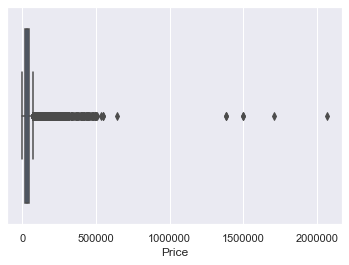

In [118]:
# detecting outliers using boxplot
sns.boxplot(x=df['Price'])

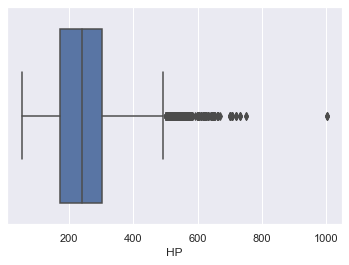

In [119]:
sns.boxplot(x=df['HP'])

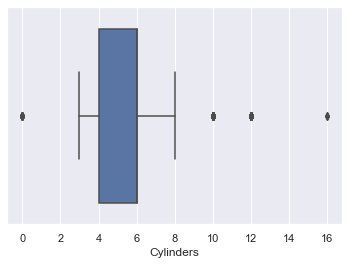

In [120]:
sns.boxplot(x=df['Cylinders'])

In [121]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [122]:
# remove outliers
df= df[~((df<(Q1 - 1.5 * IQR)) | (df>(Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9191, 10)

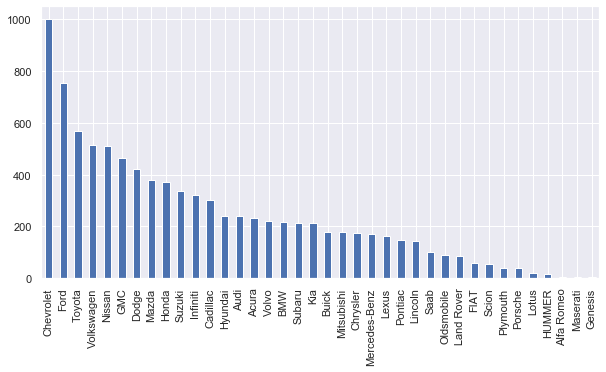

In [125]:
# Plotting Histogram
df.Make.value_counts().plot(kind='bar', figsize=(10,5))

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


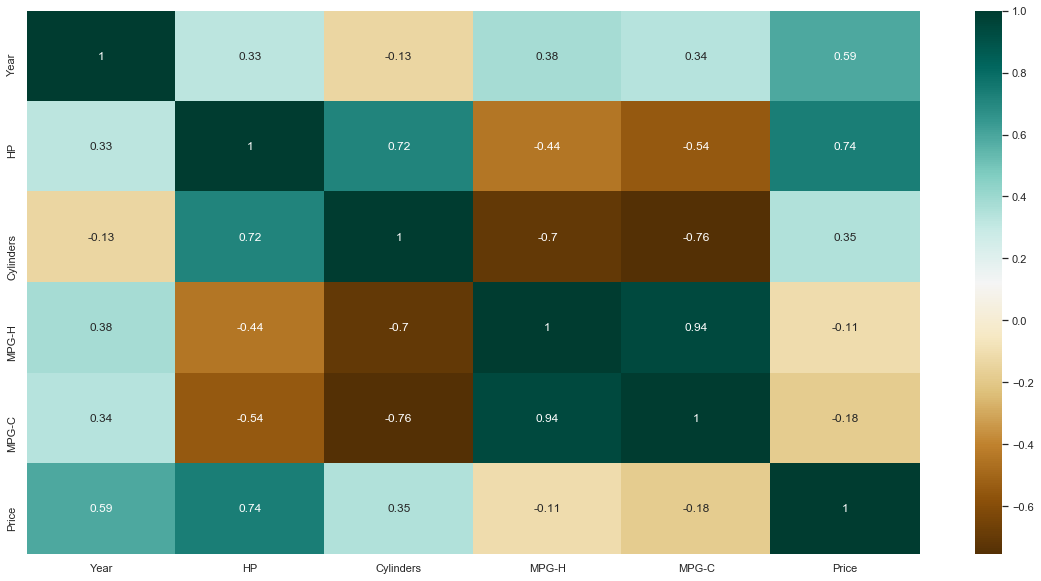

In [129]:
# Finding the relations between the variables
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

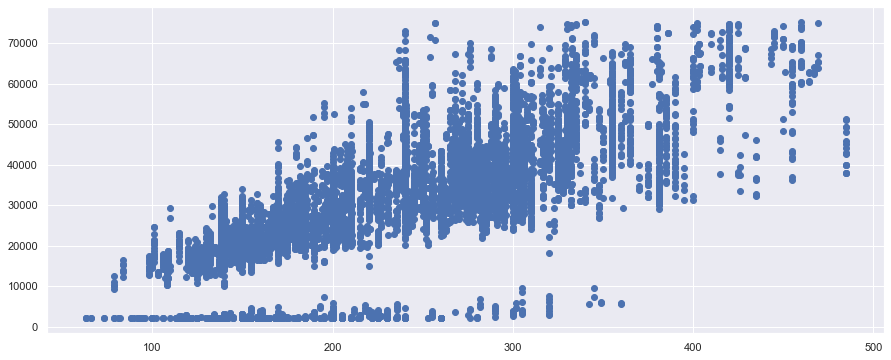

In [136]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(df['HP'], df['Price'])
plt.show()